In [ ]:
import pandas as pd
import os

In [ ]:
df= pd.read_csv("full_data.csv",index_col=False)

In [ ]:
df.columns
df.drop('Unnamed: 0',axis=1)

,Local Time,Aqi,Co,No2,O3,Pm10,Pm25,So2,Train Name,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV_Index,Wind Speed,Latitude,Longitude
0,2023-01-01 00:00:00,53,132.7,2.7,81.3,20.0,13.33,4.0,Trảng Bàng,100.0,0.00,1014.0,59.0,24.8,0.0,2.80,11.02987,106.35751
1,2023-01-01 00:00:00,169,320.8,79.3,24.3,100.7,69.33,141.0,Quận Mười Một,50.0,0.00,1014.0,69.0,24.0,0.0,1.50,10.76383,106.64355
2,2023-01-01 00:00:00,169,320.8,79.3,24.3,100.7,69.33,141.0,Tân Túc,41.0,0.00,1013.0,67.0,24.2,0.0,1.33,10.69541,106.59128
3,2023-01-01 00:00:00,53,132.7,2.7,81.3,20.0,13.33,4.0,Dầu Tiếng,100.0,0.25,1014.0,62.0,24.4,0.0,3.60,11.27410,106.35879
4,2023-01-01 00:00:00,169,320.8,79.3,24.3,100.7,69.33,141.0,Quận Bốn,50.0,0.00,1014.0,69.0,24.0,0.0,1.50,10.76684,106.70574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941428,2025-09-30 06:00:00,51,83.5,10.3,39.0,56.0,6.00,16.0,Dĩ An,100.0,0.00,1006.0,98.0,25.2,0.6,1.60,10.90682,106.76940
941429,2025-09-30 06:00:00,51,59.7,3.0,44.7,56.0,6.00,7.3,Chơn Thành,99.0,0.25,1004.0,96.0,24.8,0.6,1.60,11.42821,106.63536
941430,2025-09-30 06:00:00,51,83.5,10.3,39.0,56.0,6.00,16.0,Thủ Dầu Một,100.0,0.00,1009.0,98.0,25.2,0.6,1.60,10.98040,106.65190
941431,2025-09-30 06:00:00,51,103.7,21.0,28.3,56.0,6.00,40.0,Dầu Tiếng,100.0,0.25,1009.0,96.0,25.2,0.6,1.60,11.27410,106.35879


In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['Local Time'] = pd.to_datetime(df_copy['Local Time'])
print(df_copy.isnull().sum())

Unnamed: 0            0
Local Time            0
Aqi                   0
Co                    0
No2                   0
O3                    0
Pm10                  0
Pm25                  0
So2                   0
Train Name            0
Clouds               18
Precipitation         0
Pressure             16
Relative Humidity    16
Temperature          14
UV_Index             18
Wind Speed           18
Latitude              0
Longitude             0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Giả sử df_copy đã có sẵn
df_copy['Local Time'] = pd.to_datetime(df_copy['Local Time'])
df_copy = df_copy.set_index('Local Time')
weather_cols = ['Clouds', 'Precipitation', 'Pressure',
                'Relative Humidity', 'Temperature', 'UV_Index', 'Wind Speed']

df_copy[weather_cols] = df_copy[weather_cols].ffill().bfill()

# Encode train name
le = LabelEncoder()
df_copy['Train Name'] = le.fit_transform(df_copy['Train Name'])


In [ ]:
df_copy.isnull().sum()

,0
Unnamed: 0,0
Aqi,0
Co,0
No2,0
O3,0
Pm10,0
Pm25,0
So2,0
Train Name,0
Clouds,0


In [ ]:
df_aqi_train = df_copy[['Aqi', 'Train Name']]
display(df_aqi_train.head())
df_aqi_train.info()

,Aqi,Train Name
Local Time,,
2023-01-01,53,34
2023-01-01,169,21
2023-01-01,169,36
2023-01-01,53,6
2023-01-01,169,17


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941433 entries, 2023-01-01 00:00:00 to 2025-09-30 07:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Aqi         941433 non-null  int64
 1   Train Name  941433 non-null  int64
dtypes: int64(2)
memory usage: 21.5 MB


In [ ]:
grouped_trains = df_aqi_train.groupby('Train Name')

In [ ]:
from sklearn.ensemble import IsolationForest

train_models = {}

for train_name, group_data in grouped_trains:
    # Initialize Isolation Forest model
    # Adjust the 'contamination' parameter to control the proportion of outliers
    iso_forest = IsolationForest(n_estimators=100, contamination=0.001, random_state=42) # Further reduced contamination

    # Fit the model to the 'Aqi' data
    # Reshape 'Aqi' to be a 2D array as required by IsolationForest
    aqi_data = group_data['Aqi'].values.reshape(-1, 1)
    iso_forest.fit(aqi_data)

    # Store the fitted model
    train_models[train_name] = iso_forest

print(f"Fitted Isolation Forest models for {len(train_models)} train groups.")

Fitted Isolation Forest models for 40 train groups.


In [ ]:
train_outliers = {}

for train_name, model in train_models.items():
    # Retrieve the original 'Aqi' data for the current train from grouped_trains
    group_data = grouped_trains.get_group(train_name)
    aqi_data = group_data['Aqi'].values.reshape(-1, 1)

    # Predict outliers using the fitted model
    outlier_predictions = model.predict(aqi_data)

    # Identify the outliers (where prediction is -1)
    outliers = group_data[outlier_predictions == -1]

    # Store the outliers for the current train
    train_outliers[train_name] = outliers

print(f"Identified outliers for {len(train_outliers)} train groups.")

Identified outliers for 40 train groups.


In [ ]:
import numpy as np

# Replace outliers with NaN
for train_name, outliers_df in train_outliers.items():
    # Iterate through the outliers DataFrame for the current train
    for index, row in outliers_df.iterrows():
        # Find the corresponding row in the original df_copy using the index (Local Time) and Train Name
        # and replace the 'Aqi' value with NaN
        df_copy.loc[(df_copy.index == index) & (df_copy['Train Name'] == train_name), 'Aqi'] = np.nan

print("Outliers have been replaced with NaN values in the 'Aqi' column of df_copy.")

Outliers have been replaced with NaN values in the 'Aqi' column of df_copy.


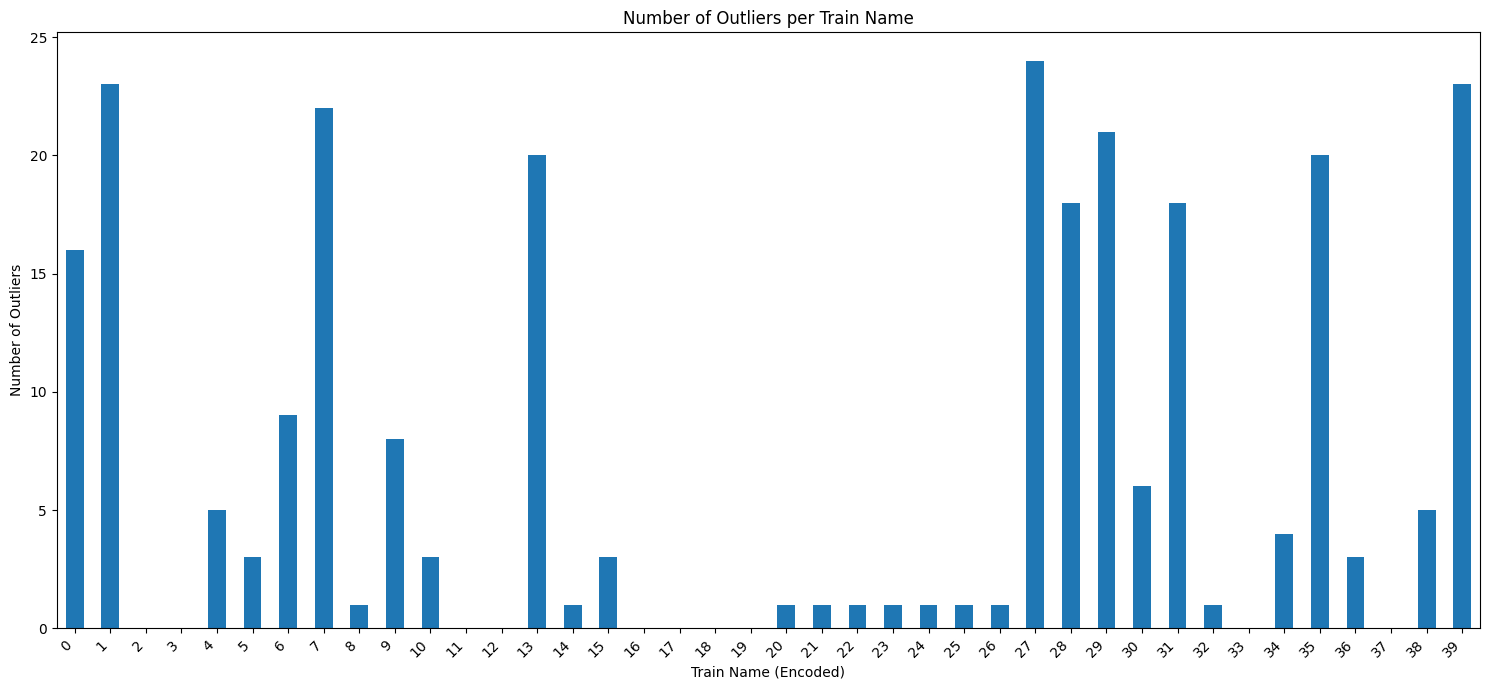

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the number of outliers for each train name and store it in a pandas Series.
# This code was moved from cell d395799e
outliers_per_train = pd.Series({train_name: len(outliers_df) for train_name, outliers_df in train_outliers.items()})


# 3. Plot a bar chart showing the number of outliers per train name.
plt.figure(figsize=(15, 7))
outliers_per_train.plot(kind='bar')
plt.title('Number of Outliers per Train Name')
plt.xlabel('Train Name (Encoded)')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# 1. Calculate the total number of outliers across all train names.
total_outliers = sum(len(outliers_df) for outliers_df in train_outliers.values())
print(f"Total number of outliers across all train names: {total_outliers}")

# 2. Calculate the number of outliers for each train name and store it in a pandas Series.
outliers_per_train = pd.Series({train_name: len(outliers_df) for train_name, outliers_df in train_outliers.items()})
print("\nNumber of outliers per train name:")
display(outliers_per_train)

Total number of outliers across all train names: 264

Number of outliers per train name:


,0
0,16
1,23
2,0
3,0
4,5
5,3
6,9
7,22
8,1
9,8


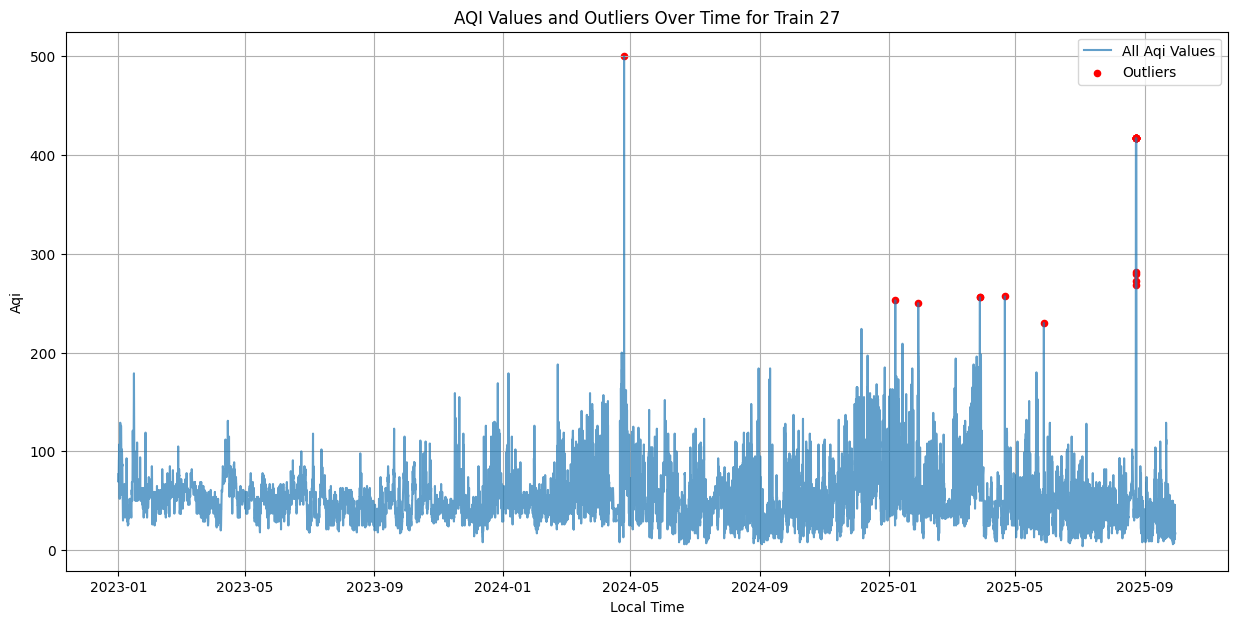

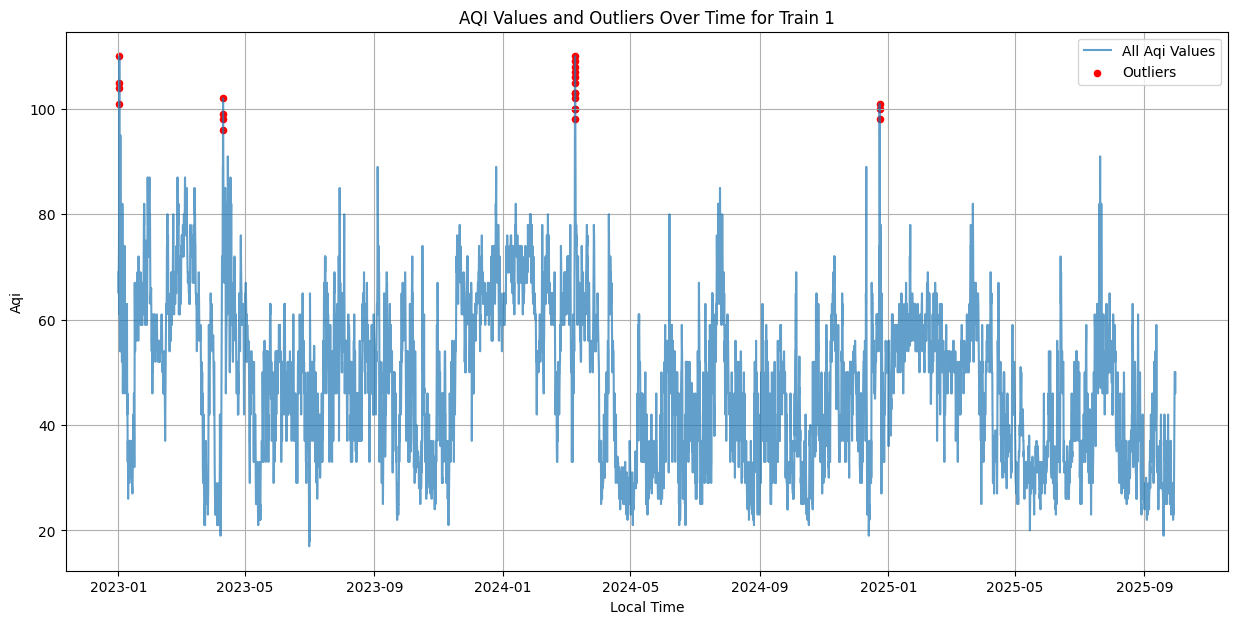

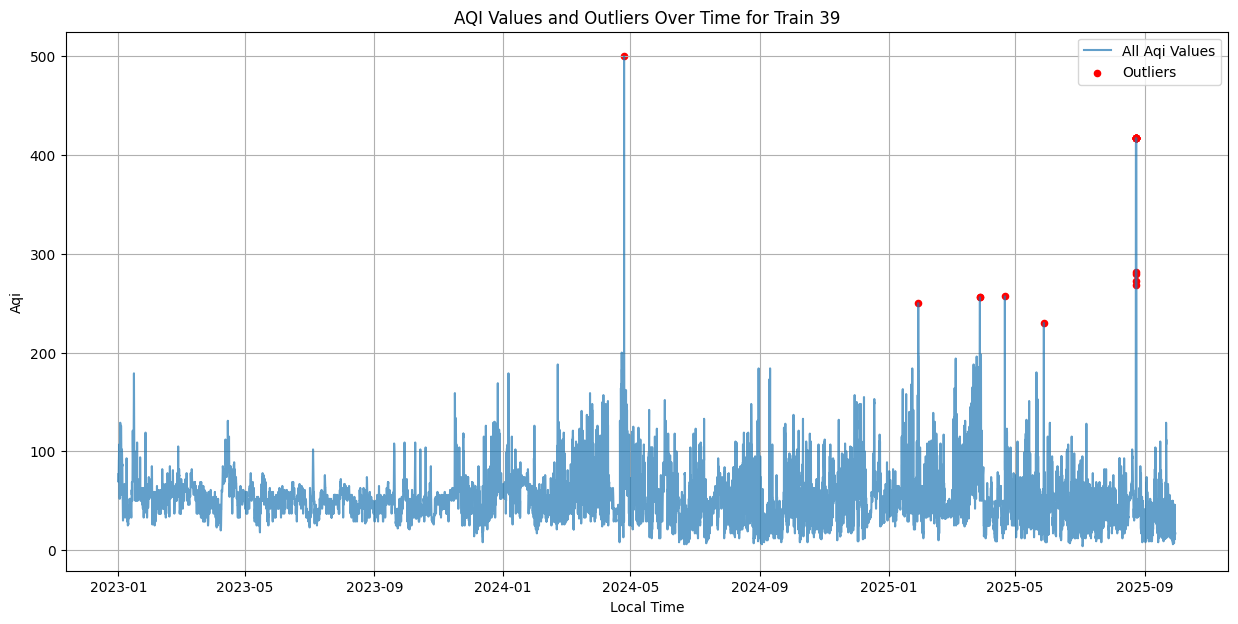

In [ ]:
# 4. For a few selected train names with a significant number of outliers, plot the 'Aqi' values over time, highlighting the identified outliers.
# Select top 3 train names with most outliers
top_trains = outliers_per_train.nlargest(3).index.tolist()

for train_name in top_trains:
    plt.figure(figsize=(15, 7))

    # Plot all 'Aqi' values for the train
    all_aqi_data = grouped_trains.get_group(train_name)['Aqi']
    plt.plot(all_aqi_data, label='All Aqi Values', alpha=0.7)

    # Plot the outliers for the train
    outliers_df = train_outliers[train_name]
    plt.scatter(outliers_df.index, outliers_df['Aqi'], color='red', label='Outliers', s=20)

    plt.title(f'AQI Values and Outliers Over Time for Train {train_name}')
    plt.xlabel('Local Time')
    plt.ylabel('Aqi')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
df_copy.isnull().sum()

,0
Unnamed: 0,0
Aqi,264
Co,0
No2,0
O3,0
Pm10,0
Pm25,0
So2,0
Train Name,0
Clouds,0


In [ ]:
# Apply cubic spline interpolation to impute missing values in 'Aqi' for each train
df_copy['Aqi'] = df_copy.groupby('Train Name')['Aqi'].transform(lambda x: x.interpolate(method='spline', order=3))
print("Missing values in 'Aqi' have been imputed using cubic spline interpolation for each train.")

Missing values in 'Aqi' have been imputed using cubic spline interpolation for each train.


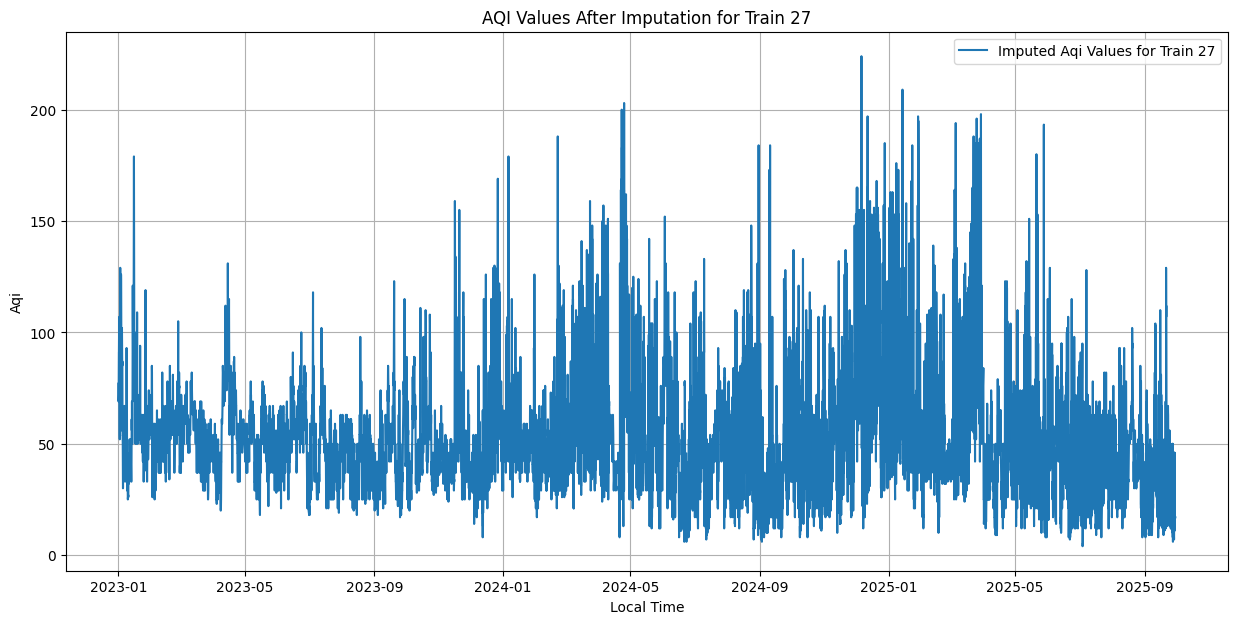

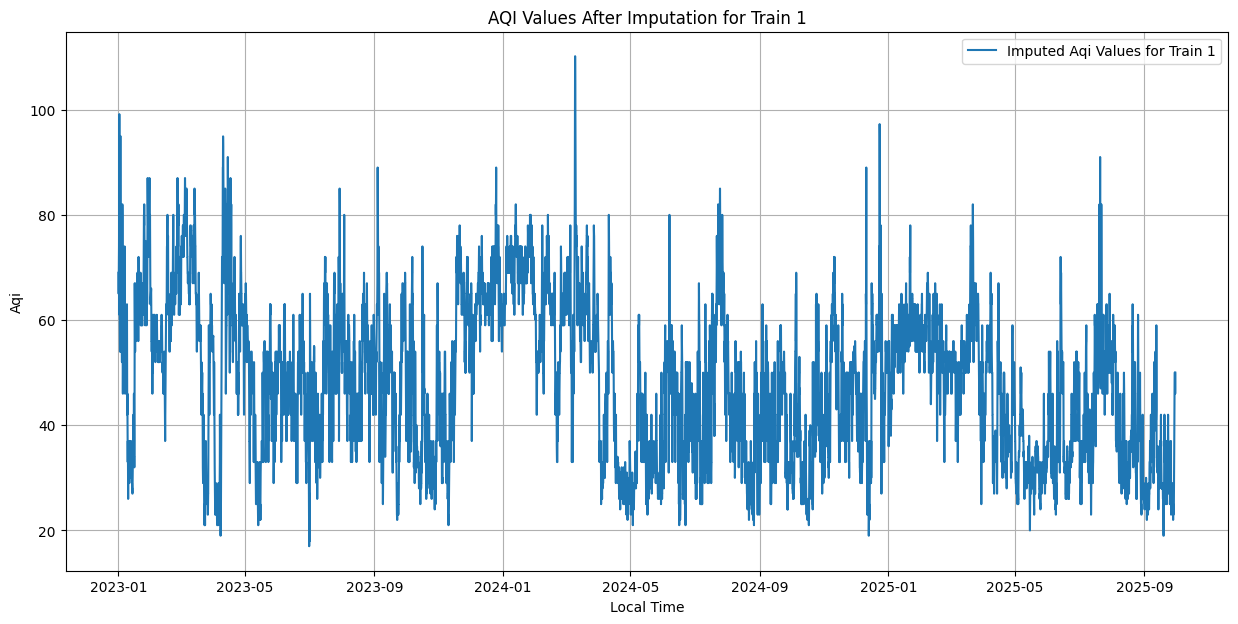

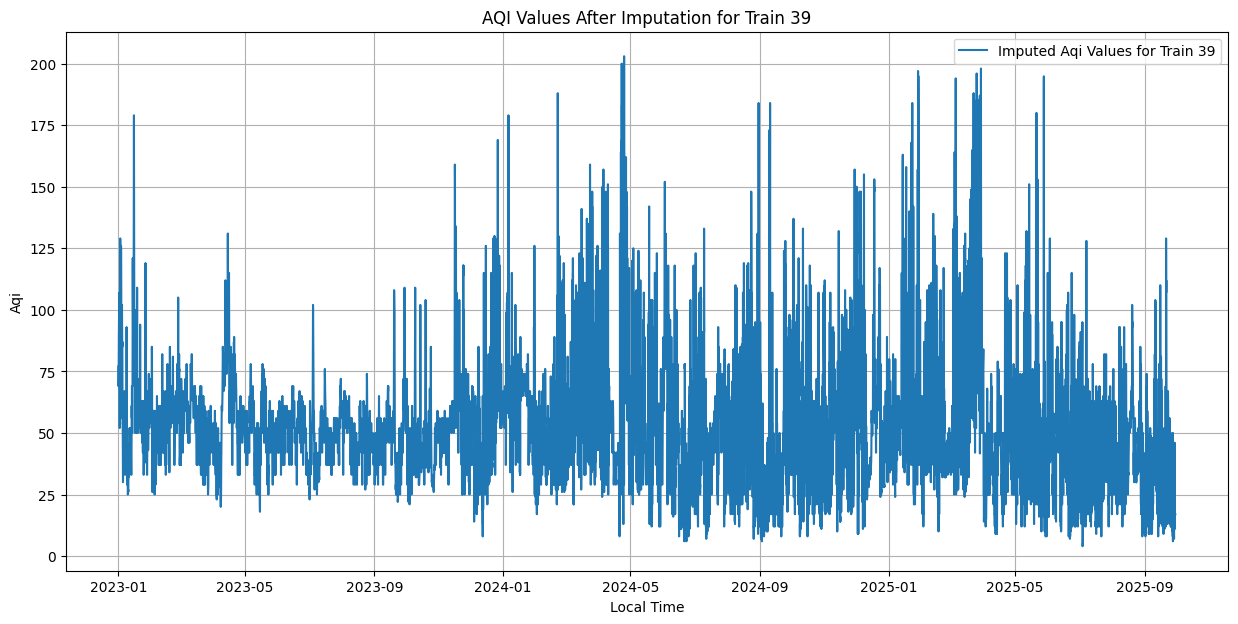

In [ ]:
import matplotlib.pyplot as plt

# Select a few train names to visualize (e.g., the ones with the most original outliers)
# We can reuse the top_trains from earlier analysis if available, otherwise select a few
if 'top_trains' not in locals():
    # If top_trains was not defined earlier, select a few train names
    train_names_to_visualize = df_copy['Train Name'].unique()[:3]
else:
    train_names_to_visualize = top_trains


for train_name in train_names_to_visualize:
    plt.figure(figsize=(15, 7))

    # Get the data for the current train
    train_data = df_copy[df_copy['Train Name'] == train_name]

    # Plot the 'Aqi' values over time after imputation
    plt.plot(train_data.index, train_data['Aqi'], label=f'Imputed Aqi Values for Train {train_name}')

    plt.title(f'AQI Values After Imputation for Train {train_name}')
    plt.xlabel('Local Time')
    plt.ylabel('Aqi')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
#Save
df_copy.to_csv('full_data_imputed.csv')

#Train

In [ ]:
import pandas as pd
import os
df= pd.read_csv("full_data_imputed.csv",index_col=False)
df.columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.columns

Index(['Local Time', 'Aqi', 'Co', 'No2', 'O3', 'Pm10', 'Pm25', 'So2',
       'Train Name', 'Clouds', 'Precipitation', 'Pressure',
       'Relative Humidity', 'Temperature', 'UV_Index', 'Wind Speed',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

df_copy = df.copy()
df_copy['Local Time'] = pd.to_datetime(df_copy['Local Time'])
print(df_copy.isnull().sum())

# Giả sử df_copy đã có sẵn
df_copy = df_copy.set_index('Local Time')
weather_cols = ['Clouds', 'Precipitation', 'Pressure',
                'Relative Humidity', 'Temperature', 'UV_Index', 'Wind Speed']

df_copy[weather_cols] = df_copy[weather_cols].ffill().bfill()

# Encode train name
# le = LabelEncoder()
# df_copy['Train Name'] = le.fit_transform(df_copy['Train Name'])
df_copy['Month']=df_copy.index.month # Access month from index
df_copy['Day']=df_copy.index.day # Access day from index
df_copy['Hour']=df_copy.index.hour # Access hour from index
df_copy['Weekday']=df_copy.index.weekday # Access weekday from index
df_copy.drop('Latitude',axis=1,inplace=True)
df_copy.drop('Longitude',axis=1,inplace=True)


# ===============================
# 3️⃣ Chia train/val/test theo năm
# ===============================
train_data = df_copy.loc['2023':'2024']
val_data   = df_copy.loc['2025-01':'2025-06']
test_data  = df_copy.loc['2025-07':'2025-09']

target_col = 'Aqi'
X_train, y_train = train_data.drop(columns=[target_col]), train_data[target_col]
X_val, y_val     = val_data.drop(columns=[target_col]), val_data[target_col]
X_test, y_test   = test_data.drop(columns=[target_col]), test_data[target_col]

# ===============================
# 4️⃣ Scale dữ liệu
# ===============================
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled   = scaler_X.transform(X_val)
X_test_scaled  = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled   = scaler_y.transform(y_val.values.reshape(-1, 1))
y_test_scaled  = scaler_y.transform(y_test.values.reshape(-1, 1))

Local Time           0
Aqi                  0
Co                   0
No2                  0
O3                   0
Pm10                 0
Pm25                 0
So2                  0
Train Name           0
Clouds               0
Precipitation        0
Pressure             0
Relative Humidity    0
Temperature          0
UV_Index             0
Wind Speed           0
Latitude             0
Longitude            0
dtype: int64


In [ ]:
# ===============================
# 5️⃣ Tạo dataset cho LSTM
# ===============================
import tensorflow as tf # Import TensorFlow here

length = 24  # 1 ngày
batch_size = 32
n_features = X_train_scaled.shape[1]

train_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    X_train_scaled, targets=y_train_scaled,
    sequence_length=length, batch_size=batch_size,
    shuffle=False)

val_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    X_val_scaled, targets=y_val_scaled,
    sequence_length=length, batch_size=batch_size,
    shuffle=False)

test_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    X_test_scaled, targets=y_test_scaled,
    sequence_length=length, batch_size=batch_size,
    shuffle=False)

In [ ]:
# ===============================
# 6️⃣ Custom metrics
# ===============================
import tensorflow as tf
from tensorflow.keras import backend as K

def rmsle_custom(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return tf.sqrt(msle(y_true, y_pred))

def r2_keras(y_true, y_pred):
    # Cast y_pred to the same data type as y_true
    y_pred = tf.cast(y_pred, y_true.dtype)
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

# ===============================
# 7️⃣ Model LSTM
# ===============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(128, input_shape=(length, n_features)),
    Dense(64, activation='tanh'),
    Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=[
        rmsle_custom,
        'mae',
        'mse',
        tf.keras.metrics.RootMeanSquaredError(name='rmse'),
        'mape',
        'msle',
        r2_keras
    ]
)

# ===============================
# 8️⃣ Callbacks
# ===============================
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=4, restore_best_weights=True
)

plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3,
    verbose=1, min_lr=1e-6
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# ===============================
# 8️⃣ Train model
# ===============================
hist = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=[es, plateau],
    verbose=1
)


Epoch 1/50
21421/21421 ━━━━━━━━━━━━━━━━━━━━ 277s 13ms/step - loss: 0.3136 - mae: 0.2827 - mape: 145.7875 - mse: 0.3136 - msle: 0.0498 - r2_keras: -2.9642 - rmse: 0.5336 - rmsle_custom: 0.0958 - val_loss: 0.1107 - val_mae: 0.2625 - val_mape: 169.4331 - val_mse: 0.1107 - val_msle: 0.0185 - val_r2_keras: -2.9065 - val_rmse: 0.3327 - val_rmsle_custom: 0.0833 - learning_rate: 0.0010
Epoch 2/50
21421/21421 ━━━━━━━━━━━━━━━━━━━━ 275s 13ms/step - loss: 0.0648 - mae: 0.1542 - mape: 119.9630 - mse: 0.0648 - msle: 0.0105 - r2_keras: -2.4141 - rmse: 0.2539 - rmsle_custom: 0.0380 - val_loss: 0.0721 - val_mae: 0.2114 - val_mape: 165.1064 - val_mse: 0.0721 - val_msle: 0.0143 - val_r2_keras: -1.2679 - val_rmse: 0.2684 - val_rmsle_custom: 0.0766 - learning_rate: 0.0010
Epoch 3/50
21421/21421 ━━━━━━━━━━━━━━━━━━━━ 274s 13ms/step - loss: 0.0272 - mae: 0.1037 - mape: 92.1397 - mse: 0.0272 - msle: 0.0042 - r2_keras: -1.0112 - rmse: 0.1626 - rmsle_custom: 0.0250 - val_loss: 0.0501 - val_mae: 0.1753 - val_mape

In [ ]:
import matplotlib.pyplot as plt

def plot_all_losses(hist):
    """
    Vẽ tất cả các loss và metric (train/val) trong history của model.
    """
    # Lấy tất cả key trong history
    keys = list(hist.history.keys())

    # Chỉ lấy các metric chính (bỏ qua val_)
    main_metrics = [k for k in keys if not k.startswith('val_')]

    for key in main_metrics:
        # Bỏ qua các metric không cần thiết
        if any(metric in key for metric in [
            'loss', 'mae', 'mse', 'rmse', 'rmsle', 'r2'
        ]):
            plt.figure(figsize=(10, 6))

            # Plot train metric
            plt.plot(hist.history[key], label=f'Train {key.replace("_", " ").title()}', linewidth=2)

            # Plot val metric nếu có
            val_key = f'val_{key}'
            if val_key in hist.history:
                plt.plot(hist.history[val_key], label=f'Val {key.replace("_", " ").title()}', linestyle='--', linewidth=2)

            plt.title(f'Model {key.replace("_", " ").title()} over Epochs', fontsize=14)
            plt.xlabel('Epoch', fontsize=12)
            plt.ylabel(key.replace("_", " ").title(), fontsize=12)
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.tight_layout()
            plt.show()

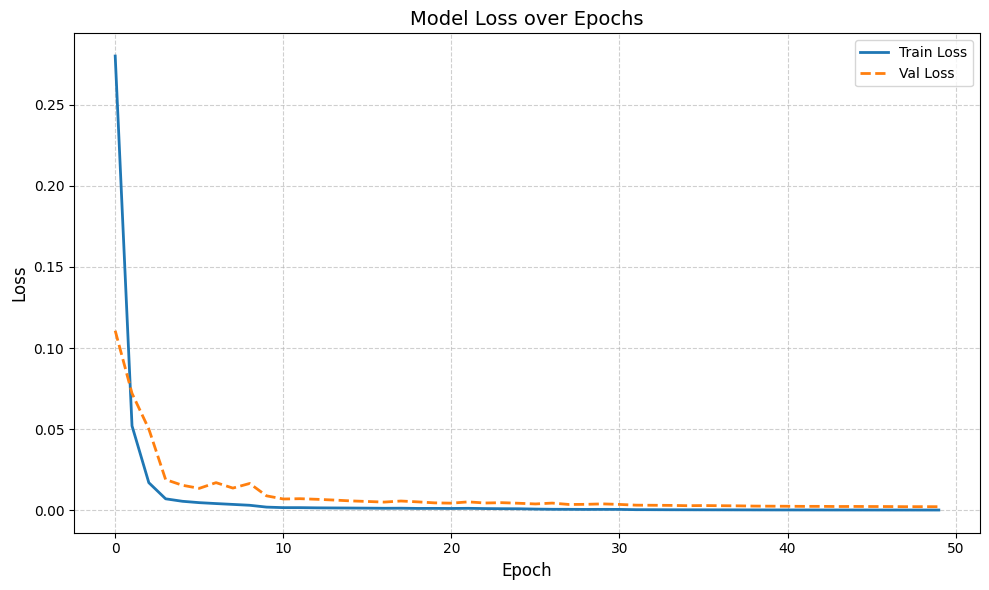

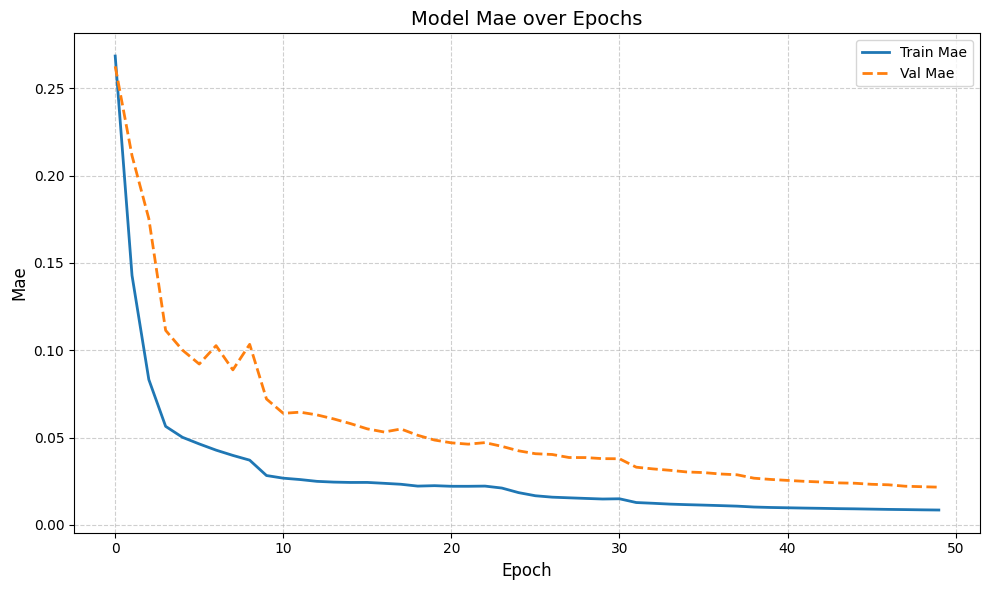

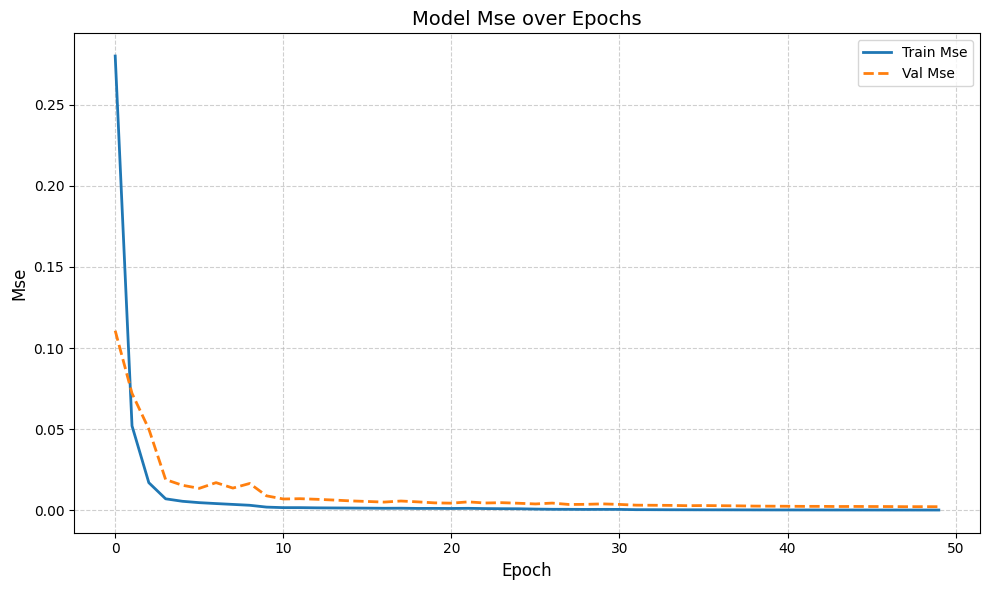

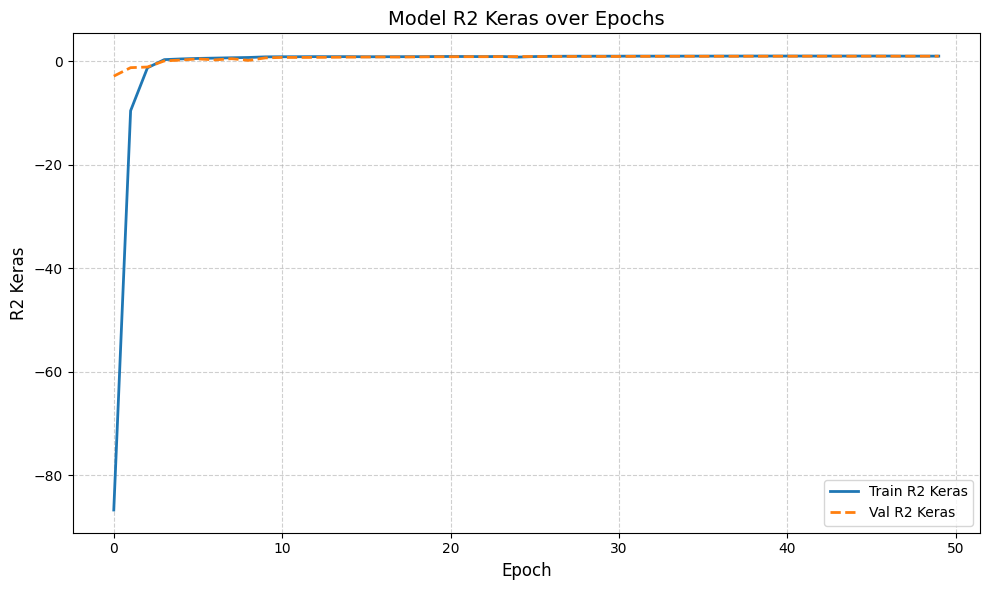

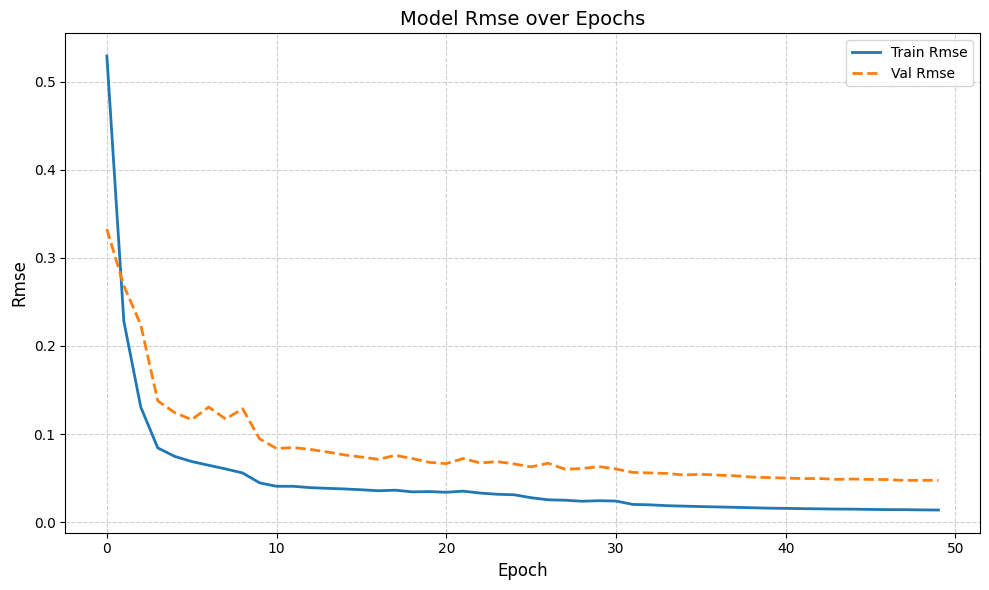

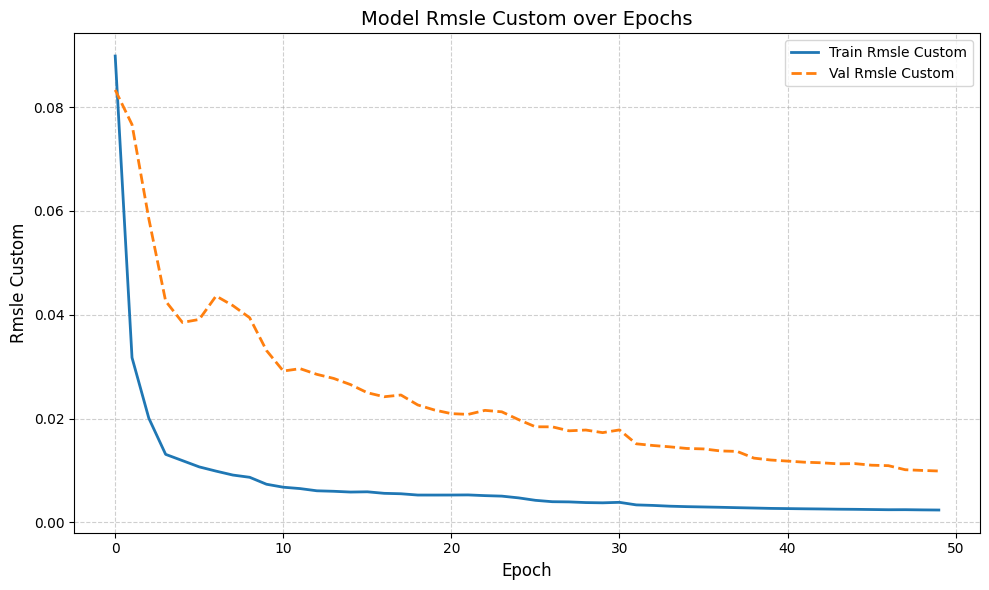

In [ ]:
plot_all_losses(hist)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Evaluate the model on the test dataset
print("Evaluating the model on the test dataset...")
test_results = model.evaluate(test_dataset, verbose=0)

# Extract metrics
test_loss = test_results[0]
test_rmsle = test_results[1]
test_mae = test_results[2]
test_mse = test_results[3]
test_rmse = test_results[4]
test_mape = test_results[5]
test_msle = test_results[6]
test_r2 = test_results[7]

Evaluating the model on the test dataset...


In [ ]:
#Print
print(f"Test Loss: {test_loss}")
print(f"Test RMSLE: {test_rmsle}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAPE: {test_mape}")
print(f"Test MSLE: {test_msle}")
print(f"Test R2: {test_r2}")

Test Loss: 0.024293523281812668
Test RMSLE: 0.014583573676645756
Test MAE: 0.0574195422232151
Test MSE: 0.024293523281812668
Test RMSE: 0.15586379170417786
Test MAPE: 28.09951400756836
Test MSLE: 0.0021858911495655775
Test R2: -26.811830520629883


In [ ]:
def save_lstm_model(model, model_name="lstm_model"):
    """
    Saves the trained LSTM model to Google Drive.

    Args:
        model: The trained Keras model object.
        model_name (str): The base name for the saved model file (without extension).
    """
    # Define the path to save the model
    model_save_path =model_name+".h5"

    print(f"Saving the model to: {model_save_path}")
    model.save(model_save_path)
    print("Model saved successfully!")

# Call the function to save the model
save_lstm_model(model, "lstm")

Saving the model to: lstm.h5
Model saved successfully!


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate metrics
y_hat_test=model.predict(test_dataset)
y_hat_test_inv = scaler_y.inverse_transform(y_hat_test)
y_test_inv = scaler_y.inverse_transform(y_test_scaled[:len(y_hat_test)])

2696/2696 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from tensorflow.keras.metrics import MeanSquaredLogarithmicError

def evaluate_and_print_metrics(y_true_inv, y_hat_inv, X_test_scaled):
    """
    Calculates and prints various evaluation metrics.

    Args:
        y_true_inv (np.ndarray): The inverse-scaled true values.
        y_hat_inv (np.ndarray): The inverse-scaled predicted values.
        X_test_scaled (np.ndarray): The scaled test features (used for adjusted R-squared).
    """
    # Calculate R-squared
    r2 = r2_score(y_true_inv, y_hat_inv)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true_inv, y_hat_inv)

    #MSE
    mse = mean_squared_error(y_true_inv, y_hat_inv)

    #RMSE
    rmse = np.sqrt(mse)

    #MSLE
    msle_metric = MeanSquaredLogarithmicError()
    msle = msle_metric(y_true_inv, y_hat_inv).numpy() # Calculate MSLE using the Keras metric

    # Calculate Mean Absolute Percentage Error (MAPE)
    # Avoid division by zero in MAPE calculation
    mape = np.mean(np.abs((y_true_inv - y_hat_inv) / (y_true_inv + 1e-8))) * 100


    # Calculate Adjusted R-squared
    n = len(y_true_inv)
    p = X_test_scaled.shape[1] # Use the number of features from the scaled data
    # Ensure n > p + 1 for adjusted R-squared calculation
    if n > p + 1:
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    else:
        adjusted_r2 = np.nan # Cannot calculate adjusted R-squared

    print(f"Test Metrics:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MSLE: {msle:.4f}")
    # RMSLE can be calculated from MSLE
    rmsle = np.sqrt(msle)
    print(f"  RMSLE: {rmsle:.4f}")
    print(f"  MAPE: {mape:.4f}")
    print(f"  R-squared: {r2:.4f}")
    print(f"  Adjusted R-squared: {adjusted_r2:.4f}")

In [ ]:
#Call
evaluate_and_print_metrics(y_test_inv, y_hat_test_inv, X_test_scaled)

Test Metrics:
  MAE: 6.7147
  MSE: 332.2190
  RMSE: 18.2269
  MSLE: 0.1108
  RMSLE: 0.3329
  MAPE: 12.8251
  R-squared: 0.6491
  Adjusted R-squared: 0.6490


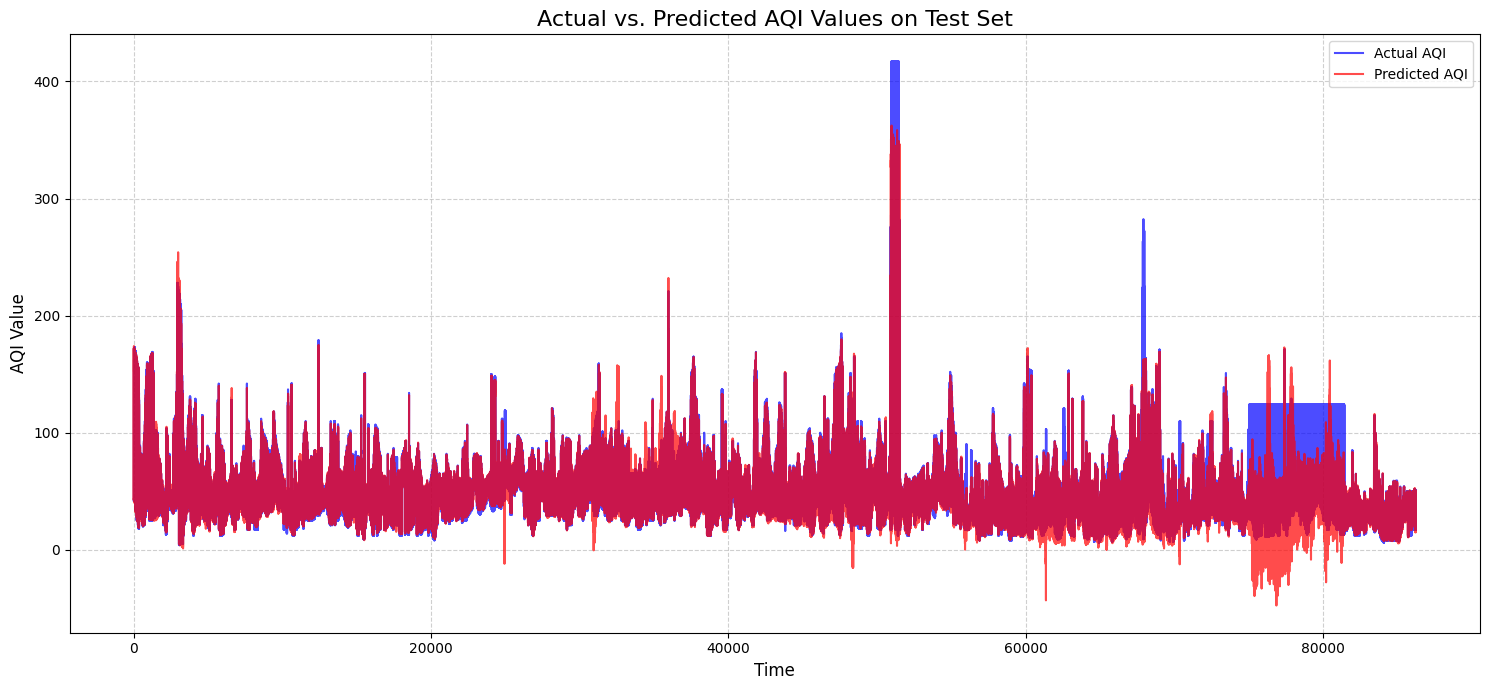

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
plt.figure(figsize=(15, 7))

# Plot the actual test values
plt.plot(y_test_inv, label='Actual AQI', color='blue', alpha=0.7)

# Plot the predicted values
# Ensure y_hat_test_inv has the same length as y_test_inv for plotting
plt.plot(y_hat_test_inv, label='Predicted AQI', color='red', alpha=0.7)

# Add title and labels
plt.title('Actual vs. Predicted AQI Values on Test Set', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

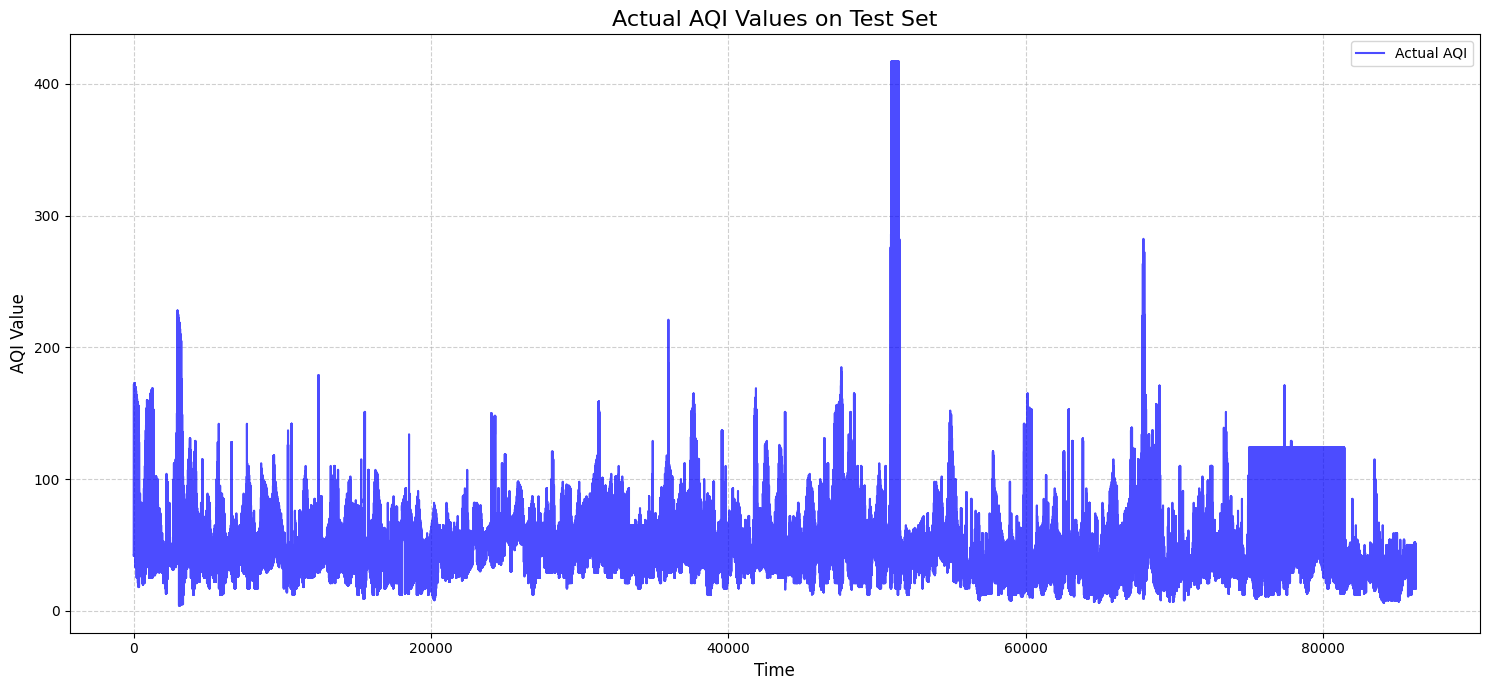

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
plt.figure(figsize=(15, 7))

# Plot the actual test values
plt.plot(y_test_inv, label='Actual AQI', color='blue', alpha=0.7)

# Add title and labels
plt.title('Actual AQI Values on Test Set', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

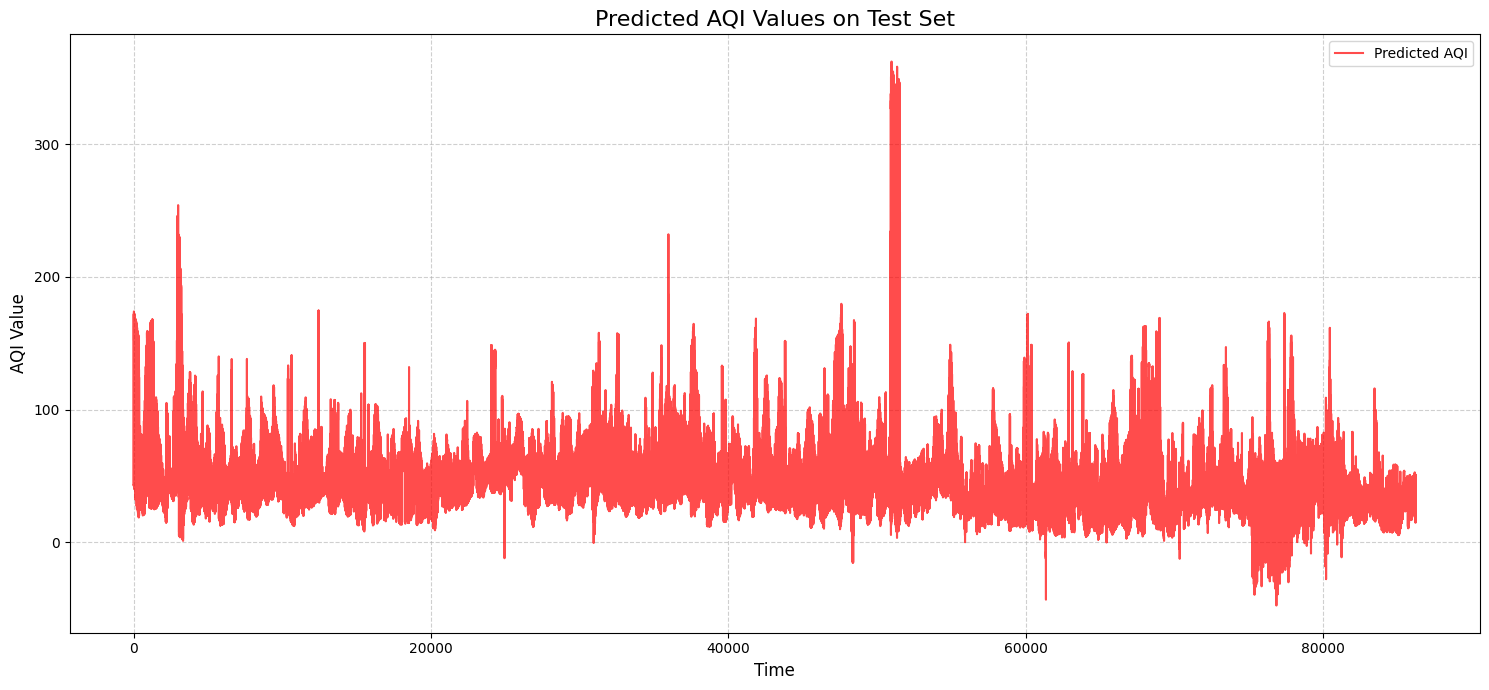

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
plt.figure(figsize=(15, 7))

# Plot the predicted values
plt.plot(y_hat_test_inv, label='Predicted AQI', color='red', alpha=0.7)

# Add title and labels
plt.title('Predicted AQI Values on Test Set', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Model Evaluation Summary

| Model        | MAE      | MSE       | RMSE      | MSLE     | RMSLE    | MAPE      | R-squared | Adjusted R-squared |
|--------------|----------|-----------|-----------|----------|----------|-----------|----------|--------------------|
| **BILSTM-CNN** | **5.9362** | **193.0403** | **13.8939** | **0.0433** | **0.2082** | **12.1745** | **0.7961** | **0.7961**             |
| GRU          | 6.2745   | 198.6965  | 14.0960   | 0.0459   | 0.2141   | 15.1622   | 0.7901   | 0.7901             |
| LSTM         | 6.7147   | 332.2190  | 18.2269   | 0.1108   | 0.3329   | 12.8251   | 0.6491   | 0.6490             |
| BILSTM       | 7.0079   | 334.1439  | 18.2796   | 0.0729   | 0.2699   | 13.8301   | 0.6471   | 0.6470             |

## Model Evaluation Summary

| Model        | MAE      | MSE       | RMSE      | MSLE     | RMSLE    | MAPE      | R-squared | Adjusted R-squared |
|--------------|----------|-----------|-----------|----------|----------|-----------|-----------|--------------------|
| BILSTM-CNN   | 5.9362   | 193.0403  | 13.8939   | 0.0433   | 0.2082   | 12.1745   | 0.7961    | 0.7961             |
| GRU          | 6.2745   | 198.6965  | 14.0960   | 0.0459   | 0.2141   | 15.1622   | 0.7901    | 0.7901             |
| LSTM         | 6.7147   | 332.2190  | 18.2269   | 0.1108   | 0.3329   | 12.8251   | 0.6491    | 0.6490             |
| BILSTM       | 7.0079   | 334.1439  | 18.2796   | 0.0729   | 0.2699   | 13.8301   | 0.6471    | 0.6470             |